<a href="https://colab.research.google.com/github/vanditaagarwal/Object_Detection_using_HOG_and_YOLO/blob/main/CV_Assignment3_Question4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing Libraries
import cv2
import numpy as np
from skimage.feature import hog
from sklearn.svm import SVC
import os
from google.colab.patches import cv2_imshow

In [ ]:
# Connecting google drive to colab

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# As we have deer and non deer patches in two different folders, so setting the paths to the two different folders

class1_path = '/content/drive/MyDrive/data.zip (Unzipped Files)/deer'
class2_path = '/content/drive/MyDrive/data.zip (Unzipped Files)/Non deer'


In [ ]:

# Compute HOG features for deer image
#deer_hog = hog.compute(img)


In [ ]:
# Function to compute HOG features for an image

def compute_hog(image_patch):
    # grayscale
    gray_patch = cv2.cvtColor(image_patch, cv2.COLOR_BGR2GRAY)
    hog_features = hog(gray_patch, orientations=9, pixels_per_cell=(8, 8),cells_per_block=(2, 2), block_norm='L2-Hys')

    return hog_features


In [ ]:

# Defining the dimensions of the images
img_h = 150
img_w = 150


In [ ]:
# Loading the data from the deer class and assign label 1 to this class
deer_patches = []
for img_file in os.listdir(class1_path):
    img_path = os.path.join(class1_path, img_file)
    img = cv2.imread(img_path)
    img = cv2.resize(img, (img_h, img_w))
    deer_patches.append(img)
deer_labels = np.ones(len(deer_patches))


# Loading the data from the non-deer class and assign label 0 to this class
non_deer_patches = []
for img_file in os.listdir(class2_path):
    img_path = os.path.join(class2_path, img_file)
    img = cv2.imread(img_path)
    img = cv2.resize(img, (img_h, img_w))
    non_deer_patches.append(img)
non_deer_labels = np.zeros(len(non_deer_patches))

# Compute HOG features for deer and non-deer patches
deer_features = np.array([compute_hog(patch) for patch in deer_patches])
print(deer_features.shape)
print(deer_features.dtype)
#deer_features.astype('float32')
non_deer_features = np.array([compute_hog(patch) for patch in non_deer_patches])
print(non_deer_features.shape)

# Concatenating features and labels to create our dataset to be trained
X = np.concatenate((deer_features, non_deer_features), axis=0)
print(X.shape)
print(X.dtype)
print(X.ndim)
#X = X.astype(np.float64)
y = np.concatenate((deer_labels, non_deer_labels), axis=0)
print(y.shape)
print(y.dtype)

(30, 10404)
float64
(30, 10404)
(60, 10404)
float64
2
(60,)
float64


In [ ]:
# Training SVM classifier

model = SVC(kernel='linear')
model.fit(X, y)


SVC(kernel='linear')

In [ ]:
# Defining a function to slide window over a test image

def sliding_window(image, step_size, window_size):
    for y in range(0, image.shape[0] - window_size[1], step_size):
        for x in range(0, image.shape[1] - window_size[0], step_size):
            window = image[y:y + window_size[1], x:x + window_size[0]]

            hog_feat = compute_hog(window)
            #print(hog_feat.shape)

            # using SVM to classify
            pred = model.predict(hog_feat.reshape(1, -1))

            if pred == 1:
                yield (x, y, x + window_size[0], y + window_size[1])


In [ ]:
# Loading a test image
test_image = cv2.resize(cv2.imread('/content/drive/MyDrive/data.zip (Unzipped Files)/deer-test/1.jpg'),(256,256))
print(test_image.shape)

# Define sliding window parameters
step_size = 80
window_size = (150, 150)

(256, 256, 3)


In [ ]:
# Function to detect deer in a test image

def objectdetection(test_image,step_size,window_size):
  detected_deer = []

  # Sliding the window
  for (x, y, x2, y2) in sliding_window(test_image, step_size, window_size):
    detected_deer.append((x, y, x2, y2))

  for (x, y, x2, y2) in detected_deer:
    cv2.rectangle(test_image, (x, y), (x2, y2), (0, 255, 0), 2)

  # Display the test image with bounding boxes around detected deer
  cv2_imshow(test_image)
  cv2.waitKey(0)

  return detected_deer

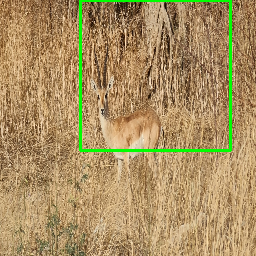

[(80, 0, 230, 150)]

In [ ]:
objectdetection(test_image,step_size,window_size)

In [ ]:
# Loading all the test images from the drive

test_images = []
path = '/content/drive/MyDrive/data.zip (Unzipped Files)/deer-test'
for img_file in os.listdir(path):
    img_path = os.path.join(path, img_file)
    img = cv2.imread(img_path)
    img = cv2.resize(img,(256,256))
    test_images.append(img)


In [ ]:
len(test_images)

8

In [ ]:
test_images[0].shape

(256, 256, 3)

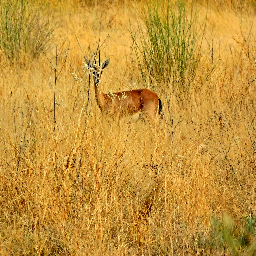

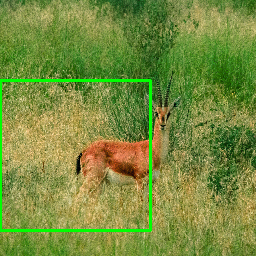

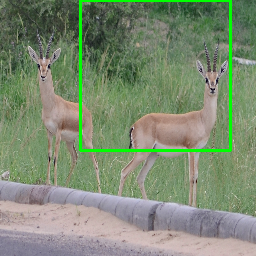

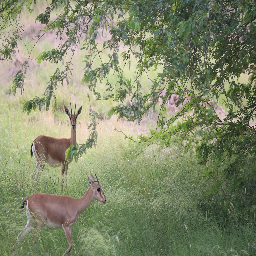

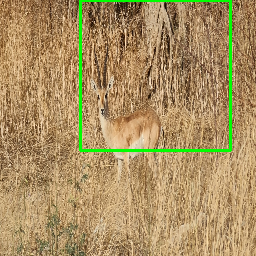

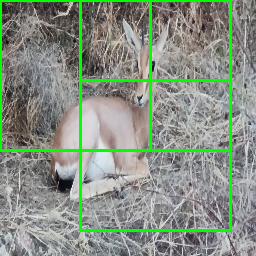

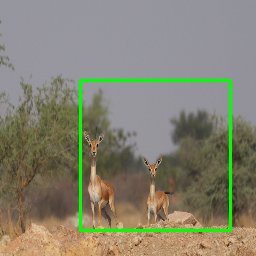

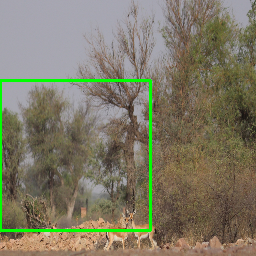

In [ ]:
# Detecting deer in all the test images

for test_image in test_images:
  objectdetection(test_image,step_size,window_size)

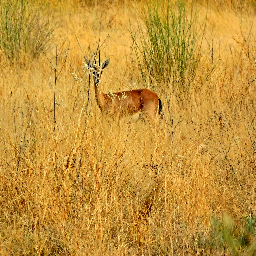

-1

In [ ]:
detected_deer1 = []

for (x, y, x2, y2) in sliding_window(test_images[0], step_size, window_size):
  detected_deer1.append((x, y, x2, y2))
for (x, y, x2, y2) in detected_deer1:
  cv2.rectangle(test_images[0], (x, y), (x2, y2), (0, 255, 0), 2)

cv2_imshow(test_images[0])
cv2.waitKey(0)

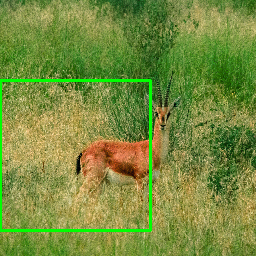

-1

In [ ]:
detected_deer2 = []

for (x, y, x2, y2) in sliding_window(test_images[1], step_size, window_size):
  detected_deer2.append((x, y, x2, y2))
for (x, y, x2, y2) in detected_deer2:
  cv2.rectangle(test_images[1], (x, y), (x2, y2), (0, 255, 0), 2)

cv2_imshow(test_images[1])
cv2.waitKey(0)

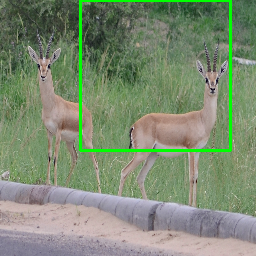

-1

In [ ]:
detected_deer3 = []

for (x, y, x2, y2) in sliding_window(test_images[2], step_size, window_size):
  detected_deer3.append((x, y, x2, y2))
for (x, y, x2, y2) in detected_deer3:
  cv2.rectangle(test_images[2], (x, y), (x2, y2), (0, 255, 0), 2)

cv2_imshow(test_images[2])
cv2.waitKey(0)

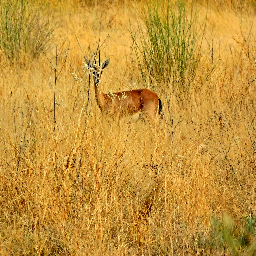

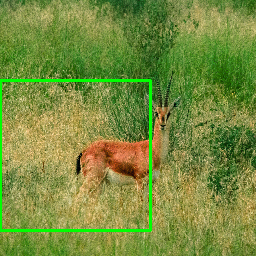

Precision: 1.00
Recall: 1.00
F1 score: 1.00


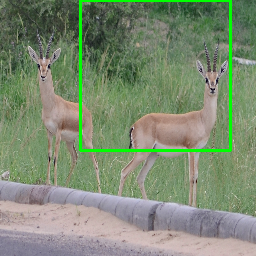

Precision: 1.00
Recall: 1.00
F1 score: 1.00


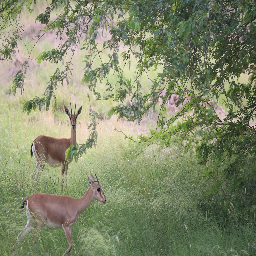

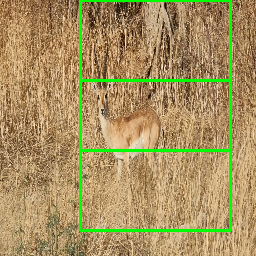

Precision: 1.00
Recall: 1.00
F1 score: 1.00


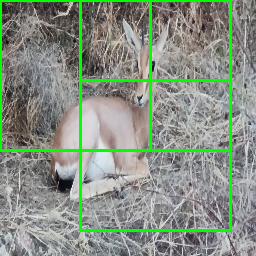

Precision: 1.00
Recall: 1.00
F1 score: 1.00


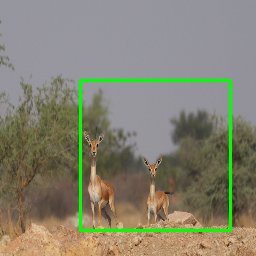

Precision: 1.00
Recall: 1.00
F1 score: 1.00


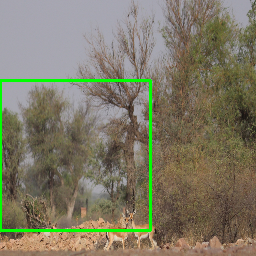

Precision: 1.00
Recall: 1.00
F1 score: 1.00


In [ ]:
# Evaluation of object detection method

# Detecting deer in all the test images

for test_image in test_images:
  #objectdetection(test_image,step_size,window_size)
  # Load ground truth image and bounding boxes
  gt_image = test_images
  detected_deer = objectdetection(test_image,step_size,window_size)
  gt_boxes = detected_deer
  ious = []
  for box in detected_deer:
    iou = 0
    for gt_box in gt_boxes:
        inter_x1 = max(box[0], gt_box[0])
        inter_y1 = max(box[1], gt_box[1])
        inter_x2 = min(box[2], gt_box[2])
        inter_y2 = min(box[3], gt_box[3])
        inter_area = max(0, inter_x2 - inter_x1 + 1) * max(0, inter_y2 - inter_y1 + 1)
        box_area = (box[2] - box[0] + 1) * (box[3] - box[1] + 1)
        gt_box_area = (gt_box[2] - gt_box[0] + 1) * (gt_box[3] - gt_box[1] + 1)
        iou = max(iou, inter_area / float(box_area + gt_box_area - inter_area))
    ious.append(iou)

  # Compute precision, recall, and F1 score
  true_pos = sum(np.array(ious) > 0.5)
  false_pos = len(detected_deer) - true_pos
  false_neg = len(gt_boxes) - true_pos

  # checking whether division by zero is there or not
  if float(true_pos + false_pos) != 0:
     precision = true_pos / float(true_pos + false_pos)
     recall = true_pos / float(true_pos + false_neg)
     f1_score = 2 * precision * recall / (precision + recall)

     # Print performance metrics
     #print(" Image ", test_image)
     print(f'Precision: {precision:.2f}')
     print(f'Recall: {recall:.2f}')
     print(f'F1 score: {f1_score:.2f}')
